In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist

In [45]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

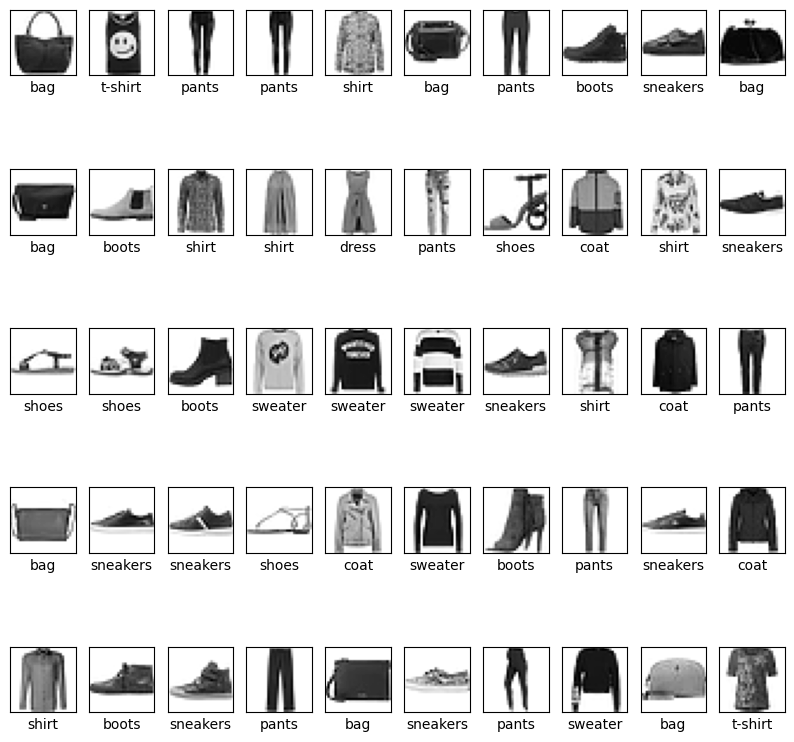

In [46]:
classes = ['t-shirt', 'pants', 'sweater', 'dress', 'coat', 'shoes', 'shirt', 'sneakers', 'bag', 'boots']

plt.figure(figsize=(10, 10))
for i in range(100, 150):
    plt.subplot(5, 10, i - 100 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])

plt.show()

In [47]:
# Масштабування значень пікселів до діапазону від 0 до 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Змінюємо розмір зображень та додаємо новий канал (ч/б зображення)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [48]:
# Преобразування цільових міток до формату one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [49]:
# Створення CNN моделі
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# Виведення інформації про модель
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [51]:
# Тренування моделі
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 78s 40ms/step - loss: 0.5015 - accuracy: 0.8168 - val_loss: 0.3838 - val_accuracy: 0.8609
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3263 - accuracy: 0.8807 - val_loss: 0.3468 - val_accuracy: 0.8752
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2767 - accuracy: 0.8982 - val_loss: 0.2889 - val_accuracy: 0.8945
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2467 - accuracy: 0.9071 - val_loss: 0.2785 - val_accuracy: 0.8978
Epoch 5/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2204 - accuracy: 0.9184 - val_loss: 0.2624 - val_accuracy: 0.9080
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1995 - accuracy: 0.9261 - val_loss: 0.2886 - val_accuracy: 0.8986
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1819 - accuracy: 0.9320 - val_loss: 0.2704 -

In [52]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 10ms/step - loss: 0.2732 - accuracy: 0.9134
Test accuracy: 0.9133999943733215


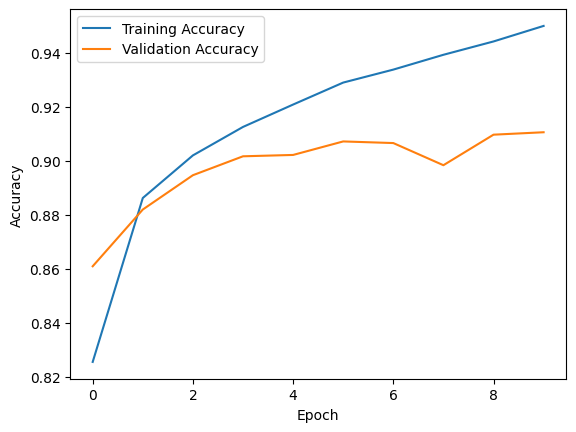

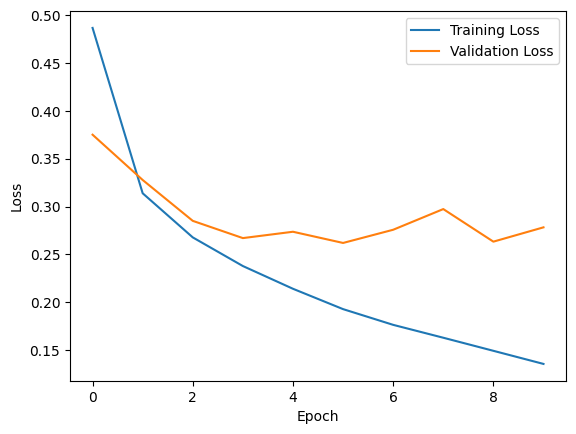

In [42]:
# Виведення графіків точності та втрат від кількості епох
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
